In [1]:
#import libraries
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import warnings as w       #prevents future warning error
w.filterwarnings('ignore') #prevents future warning error
pd.set_option('display.float_format', lambda x: '%.1f' % x) #Disables scientific notation in Pandas

# Covid Task Analysis

In this notebook the task was to analyze the impact of covid measures restrictions and present three different graphs.

There is some eda to get usefull info followed by how stringency_index correlates with cases and deaths worldwide

# EDA

In [6]:
#read csv 
df=pd.read_csv("df_cleaned.csv")
#column date to datetime
df['date'] =  pd.to_datetime(df['date'])

In [7]:
#china will be excluded due to false data provided
df = df[df["location"].str.contains("China") == False]

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179159 entries, 0 to 180021
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   continent                   179159 non-null  object        
 1   location                    179159 non-null  object        
 2   date                        179159 non-null  datetime64[ns]
 3   total_cases                 171636 non-null  float64       
 4   new_cases                   171433 non-null  float64       
 5   total_deaths                153382 non-null  float64       
 6   new_deaths                  153194 non-null  float64       
 7   icu_patients                25475 non-null   float64       
 8   hosp_patients               26729 non-null   float64       
 9   positive_rate               92202 non-null   float64       
 10  total_vaccinations          45561 non-null   float64       
 11  people_vaccinated           43510 non-n

In [9]:
#df shape
df.shape

(179159, 27)

In [10]:
#df columns
df.columns


Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'icu_patients', 'hosp_patients',
       'positive_rate', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters', 'new_vaccinations',
       'stringency_index', 'population', 'population_density', 'median_age',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'day', 'month_num',
       'year', 'month_name'],
      dtype='object')

Calculating total cases/deaths/vaccinations worldwide

In [11]:
cases_per_year=df.groupby('year')['new_cases'].sum()
cases_per_year_df=pd.DataFrame(cases_per_year)
cases_per_year_df.reset_index(inplace=True)
deaths_per_year=df.groupby('year')['new_deaths'].sum()
deaths_per_year_df=pd.DataFrame(deaths_per_year)
deaths_per_year_df.reset_index(inplace=True)
vacc_per_year=df.groupby('year')['new_vaccinations'].sum()
vacc_per_year_df=pd.DataFrame(vacc_per_year)
vacc_per_year_df.reset_index(inplace=True)

In [12]:
print("total cases per year")
print(cases_per_year)
print("\n")
print("total deaths per year")
print(deaths_per_year)
print("\n")
print("total vaccinations per year")
print(vacc_per_year)

total cases per year
year
2020    82949251.0
2021   205281545.0
2022   240665388.0
Name: new_cases, dtype: float64


total deaths per year
year
2020   1870241.0
2021   3540101.0
2022    840133.0
Name: new_deaths, dtype: float64


total vaccinations per year
year
2020      7147442.0
2021   5196278630.0
2022   1391561513.0
Name: new_vaccinations, dtype: float64


In [13]:
#merge and rename columns
info=cases_per_year_df.merge(deaths_per_year_df,on='year').merge(vacc_per_year_df,on='year')
info.rename(columns = {'year':'Year','new_cases':'Total Cases', 'new_deaths':'Total Deaths','new_vaccinations':'Total Vaccinations'}, inplace = True)

In [ ]:
#table fig
info_table_fig = go.Figure(data=[go.Table(
    header=dict(values=list(info.columns),
                fill_color='rgb(15,152,196)',
                font=dict(color='white', size=20),
                height=40,
                align='left'),
    cells=dict(values=[info["Year"], info['Total Cases'],info['Total Deaths'],info['Total Vaccinations']],
               fill_color='rgb(220,220,220)',
               font=dict(color='black', size=20),
               height=40,
               align='left'))
])
info_table_fig.update_layout(width=1000, height=400)
info_table_fig.update_layout(font=dict(family="Open Sans", size=15))
info_table_fig.update_layout(
    title_text="Per year info (World)",
    title_font_size=30,
    title_font_family="Open Sans",
    title_x=0.5,
)
info_table_fig.show()

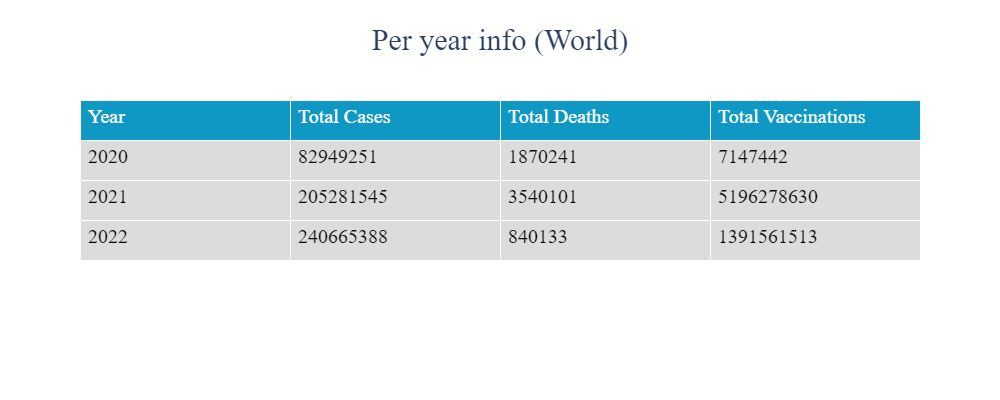

In [3]:
#Image(filename='table.png') 

Two distplots about hospital beds/thousand and avg stringency_index worldwide

In [ ]:
#hospital beds per thousand by location
hospital_beds=df.groupby('location')['hospital_beds_per_thousand'].max()

In [ ]:
#drop nan
hospital_beds.dropna(inplace=True)

In [ ]:
#series to df
hospital_beds=pd.DataFrame(hospital_beds)

In [ ]:
hospital_beds

In [ ]:
#sort by descending
hospital_beds=hospital_beds.sort_values(by='hospital_beds_per_thousand', ascending=False)

In [ ]:
#first ten records
hospital_beds.head(10)

In [ ]:
#last ten records
hospital_beds.tail(10)

In [ ]:
#distplot
plt.figure(figsize=[12,6])
sns.distplot(hospital_beds).set(title='hospital beds per thousand distplot')

In [ ]:
#avg strindency_index by location 
avg_location_stringency=df.groupby('location')['stringency_index'].mean()

In [ ]:
#series to df
avg_location_stringency=pd.DataFrame(avg_location_stringency)

In [ ]:
#drop nan
avg_location_stringency.dropna(inplace=True)

In [ ]:
#sort descending
avg_location_stringency=avg_location_stringency.sort_values(by='stringency_index', ascending=False)

In [ ]:
#first ten records
avg_location_stringency.head(10)

In [ ]:
#last ten records
avg_location_stringency.tail(10)

In [ ]:
#distplot
plt.figure(figsize=[12,6])
sns.distplot(avg_location_stringency).set(title='Avg Stringency distplot')

# Average stringency_index per year

In [ ]:
#groupby and avg strindency_index per month and year
average_stringency = df.groupby(['month_name', 'year'])['stringency_index'].mean()

In [ ]:
#series to df
average_stringency=pd.DataFrame(average_stringency)

In [ ]:
#reset index
average_stringency.reset_index(inplace=True)

In [ ]:
average_stringency

In [ ]:
#code that allows to sort by month_name
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
average_stringency['month_name'] = pd.Categorical(average_stringency['month_name'], categories=months, ordered=True)

In [ ]:
#sort ascending
average_stringency=average_stringency.sort_values(by='month_name',ascending=True)

In [ ]:
average_stringency

In [ ]:
#line chart
fig = px.line(average_stringency, x="month_name", 
          y='stringency_index',
          color='year',
          template="simple_white",
          color_discrete_sequence=px.colors.qualitative.Set2,
          width=1000,
          height=600 )
fig.update_layout(
title_text="Stringency index average by year (Worldwide)",
title_font_size=30,
title_font_family="Open Sans",
title_x=0.5,
yaxis_title=None,
xaxis_title=None,
font=dict(family="Open Sans", size=18)
)
fig.show()

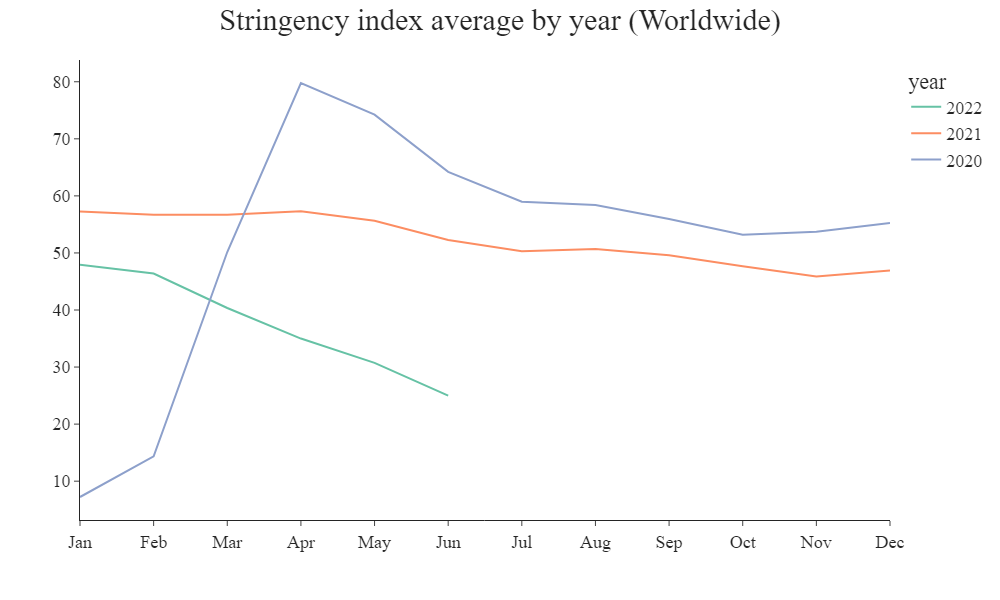

In [5]:
#Image(filename='linechart.png') 

# Stringency index impact to cases and deaths

Setting index lower and greater than 75

In [ ]:
under75= df.loc[df['stringency_index'] < 75]
over75=df.loc[df['stringency_index'] > 75]
print("under 75 stringency index total deaths :{}".format(under75['new_deaths'].sum()))
print("over 75 stringency index total deaths :{}".format(over75['new_deaths'].sum()))
print("under 75 stringency index total cases :{}".format(under75['new_cases'].sum()))
print("over 75 stringency index total cases :{}".format(over75['new_cases'].sum()))

In [ ]:
#shape
under75.shape

In [ ]:
#shape
over75.shape

Saving values and calculate percentage difference

In [ ]:
under75_deaths_sum=under75['new_deaths'].sum()

In [ ]:
over75_deaths_sum=over75['new_deaths'].sum()

In [ ]:
under75_cases_sum=under75['new_cases'].sum()

In [ ]:
over75_cases_sum=over75['new_cases'].sum()

In [ ]:
percentage_drop_deaths=(under75_deaths_sum-over75_deaths_sum)/under75_deaths_sum * 100

In [ ]:
percentage_drop_deaths=round(percentage_drop_deaths, 2)

In [ ]:
percentage_drop_deaths

In [ ]:
#string format for shown on bar chart
percentage_drop_deaths = "-{}%".format(percentage_drop_deaths)

In [ ]:
percentage_drop_deaths

In [ ]:
percentage_drop_cases=(under75_cases_sum-over75_cases_sum)/under75_cases_sum * 100

In [ ]:
percentage_drop_cases=round(percentage_drop_cases, 2)

In [ ]:
percentage_drop_cases

In [ ]:
#string format for shown on bar chart
percentage_drop_cases = "-{}%".format(percentage_drop_cases)

In [ ]:
percentage_drop_cases

In [ ]:
x=[under75_deaths_sum,over75_deaths_sum]

In [ ]:
x

Bar charts

In [ ]:
fig = go.Figure(go.Bar(y=[under75_deaths_sum], 
                       name='stringency_index under 75',
                      ))
fig.add_trace(go.Bar(y=[over75_deaths_sum], name='stringency_index over 75',text=percentage_drop_deaths, textposition='outside'))

fig.update_layout(
width=1000, 
height=500,
template="simple_white",
title_text="Total Deaths according to response measures taken ",
title_font_size=30,
title_font_family="Open Sans",
title_x=0.5,
yaxis_title=None,
xaxis_title=None,
font=dict(family="Open Sans", size=18)
)
fig.update_xaxes(
    showticklabels=False,
    visible=False,
)

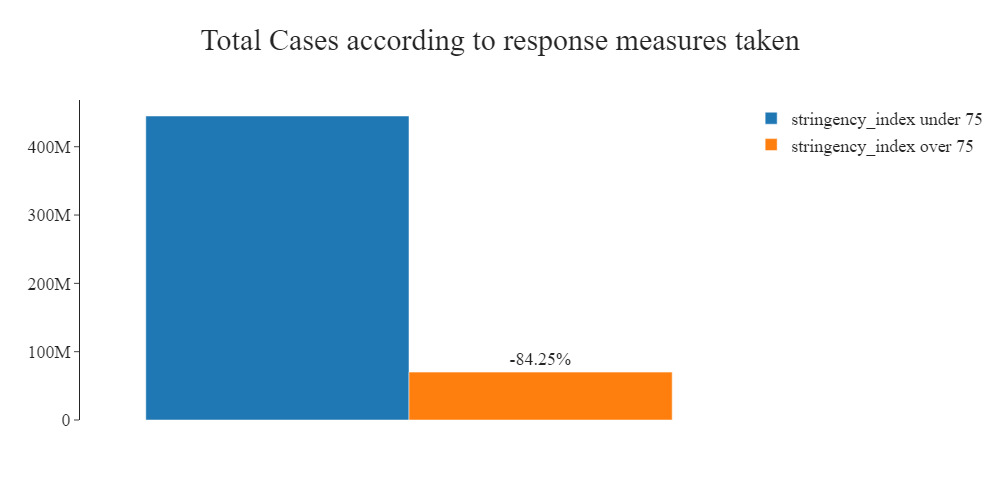

In [6]:
#Image(filename='barc.png')

In [ ]:
fig2 = go.Figure(go.Bar(y=[under75_cases_sum], name='stringency_index under 75',))
fig2.add_trace(go.Bar(y=[over75_cases_sum], name='stringency_index over 75',text=percentage_drop_cases, textposition='outside'))
fig2.update_layout(
width=1000, 
height=500,
template="simple_white",
title_text="Total Cases according to response measures taken ",
title_font_size=30,
title_font_family="Open Sans",
title_x=0.5,
yaxis_title=None,
xaxis_title=None,
font=dict(family="Open Sans", size=18)
)
fig2.update_xaxes(
    showticklabels=False,
    visible=False,
)

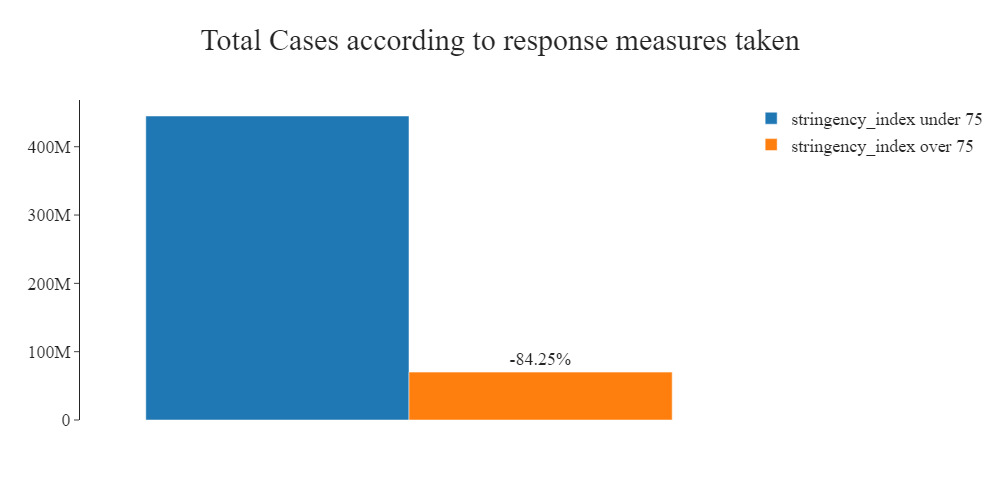

In [7]:
#Image(filename='barc.png')

# Exploring how healthcare and stringency index correlate

In [ ]:
#set population sample over 50 million
sample = df.loc[df['population'] > 50000000]
#print no countries
sample['location'].nunique()


In [ ]:
#print sample df
sample

In [ ]:
#getting max stringency_index per country
sample = sample.groupby(['hospital_beds_per_thousand', 'location','population'])['stringency_index'].max()

In [ ]:
#convert series to df
sample=pd.DataFrame(sample)

In [ ]:
#reset index
sample.reset_index(inplace=True)

In [ ]:
#sort values descending
sample=sample.sort_values(by='stringency_index', ascending=False)

In [ ]:
#first 20 records
sample.head(20)

In [ ]:
#this was calculated to set max y axis
num=float(sample.loc[sample['location'] == 'India', 'population'])
num=num+10000000

In [ ]:
#scatter plot/circe diameter is defined by hospital beds per thousand
fig = px.scatter(sample, x="stringency_index", y="population",color='location',
                 width=1000,
                 template="simple_white",
                height=600,
                 size='hospital_beds_per_thousand')
fig.update_layout(
title_text="Stringency index/hospital beds per thousand",
title_font_size=30,
title_font_family="Open sans",
title_x=0.5,
#yaxis_title=None,
#xaxis_title=None,
font=dict(family="Open sans", size=18)
)
fig.update_yaxes(range=[0, num])
fig.show()

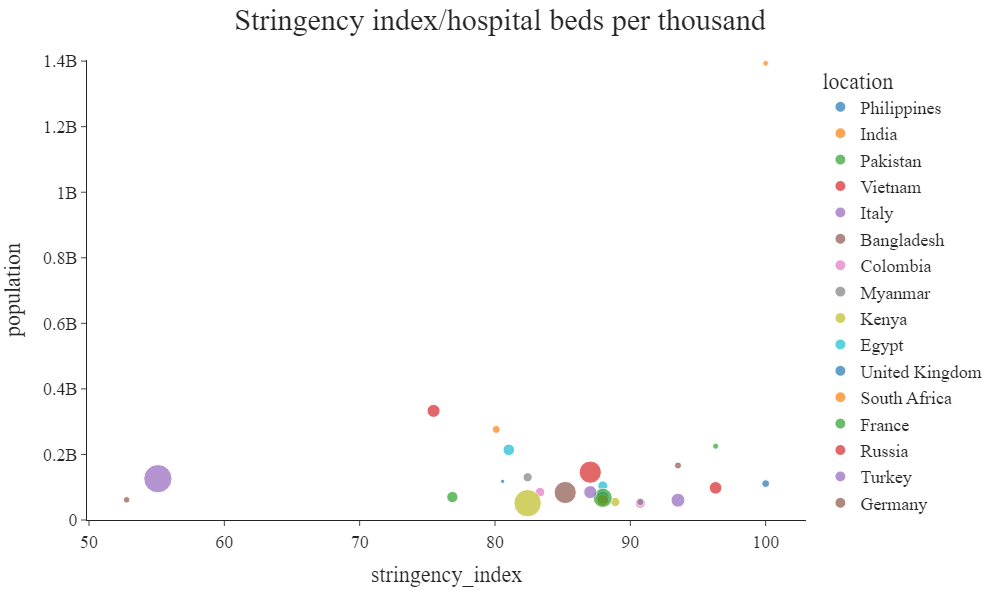

In [8]:
#Image(filename='scatter.png')

In [ ]:
#africa is an outlier to this graph due to low covid impact 